In [ ]:
Heart Disease Prediction

In [335]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [336]:
df1 = pd.read_csv(r"Heart rate data set\heart1.csv")
df2 = pd.read_csv(r"Heart rate data set\heart2.csv")

In [337]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [338]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [339]:
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [340]:
#The feature caa and thall are present in df2 but not in df1 so we are removing this two features

In [341]:
df2 = df2.drop(columns=['caa', 'thall'])

In [342]:
#Renaming the column name to match the dataset1

In [343]:
df2.columns = ("Age", "Sex", "ChestPainType", "RestingBP", 
               "Cholesterol", "FastingBS", "RestingECG", "MaxHR", 
               "ExerciseAngina", "Oldpeak", "ST_Slope", "HeartDisease")

In [344]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,1


In [345]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    int64  
 1   Sex             303 non-null    int64  
 2   ChestPainType   303 non-null    int64  
 3   RestingBP       303 non-null    int64  
 4   Cholesterol     303 non-null    int64  
 5   FastingBS       303 non-null    int64  
 6   RestingECG      303 non-null    int64  
 7   MaxHR           303 non-null    int64  
 8   ExerciseAngina  303 non-null    int64  
 9   Oldpeak         303 non-null    float64
 10  ST_Slope        303 non-null    int64  
 11  HeartDisease    303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [346]:
sex_map = {1: 'M', 0: 'F'}
chest_pain_map = {0: 'TA', 1: 'ATA', 2: 'NAP', 3: 'ASY'}
exercise_angina_map = {1: 'Y', 0: 'N'}
st_slope_map = {0: 'Up', 1: 'Flat', 2: 'Down'}

In [347]:
df2['Sex'] = df2['Sex'].map(sex_map)
df2['ChestPainType'] = df2['ChestPainType'].map(chest_pain_map)
df2['ExerciseAngina'] = df2['ExerciseAngina'].map(exercise_angina_map)
df2['ST_Slope'] = df2['ST_Slope'].map(st_slope_map)

In [348]:
resting_ecg_map = {0: 'Normal', 1: 'ST', 2: 'LVH'}
df2['RestingECG'] = df2['RestingECG'].map(resting_ecg_map)

In [349]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,63,M,ASY,145,233,1,Normal,150,N,2.3,Up,1
1,37,M,NAP,130,250,0,ST,187,N,3.5,Up,1
2,41,F,ATA,130,204,0,Normal,172,N,1.4,Down,1
3,56,M,ATA,120,236,0,ST,178,N,0.8,Down,1
4,57,F,TA,120,354,0,ST,163,Y,0.6,Down,1


In [350]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    int64  
 1   Sex             303 non-null    object 
 2   ChestPainType   303 non-null    object 
 3   RestingBP       303 non-null    int64  
 4   Cholesterol     303 non-null    int64  
 5   FastingBS       303 non-null    int64  
 6   RestingECG      303 non-null    object 
 7   MaxHR           303 non-null    int64  
 8   ExerciseAngina  303 non-null    object 
 9   Oldpeak         303 non-null    float64
 10  ST_Slope        303 non-null    object 
 11  HeartDisease    303 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 28.5+ KB


In [351]:
df = pd.concat([df1, df2], ignore_index=True)

In [352]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1216,57,F,TA,140,241,0,ST,123,Y,0.2,Flat,0
1217,45,M,ASY,110,264,0,ST,132,N,1.2,Flat,0
1218,68,M,TA,144,193,1,ST,141,N,3.4,Flat,0
1219,57,M,TA,130,131,0,ST,115,Y,1.2,Flat,0


In [353]:
df.to_csv(r'Heart rate data set\combined.csv')

In [354]:
#Understanding the Dataset

In [355]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [356]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [357]:
df.shape

(1221, 12)

In [358]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1221 non-null   int64  
 1   Sex             1221 non-null   object 
 2   ChestPainType   1221 non-null   object 
 3   RestingBP       1221 non-null   int64  
 4   Cholesterol     1221 non-null   int64  
 5   FastingBS       1221 non-null   int64  
 6   RestingECG      1221 non-null   object 
 7   MaxHR           1221 non-null   int64  
 8   ExerciseAngina  1221 non-null   object 
 9   Oldpeak         1221 non-null   float64
 10  ST_Slope        1221 non-null   object 
 11  HeartDisease    1221 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 114.6+ KB


In [360]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1221.000000,1221.00000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000
mean,53.723178,132.20475,210.578215,0.212121,139.995086,0.925143,0.551188
std,9.350481,18.27277,100.394018,0.408978,25.453461,1.092282,0.497577
min,28.000000,0.00000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.00000,188.000000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.00000,228.000000,0.000000,141.000000,0.600000,1.000000
75%,60.000000,140.00000,269.000000,0.000000,160.000000,1.600000,1.000000
max,77.000000,200.00000,603.000000,1.000000,202.000000,6.200000,1.000000


In [361]:
#df.corr(numeric_only=True)

In [362]:
#Data Cleaning Process

In [363]:
#checking for null values

In [364]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [365]:
#no null values present in the dataset

In [366]:
#checking for duplicates

In [367]:
df.duplicated().sum()

1

In [368]:
#Removing the duplicates

In [369]:
duplicates = df.duplicated().sum()
df = df.drop_duplicates()

In [370]:
#To check for outliers

In [371]:
#df.boxplot()

In [372]:
outlier_columns = []
outlier_dict = {}

In [373]:
from pandas.api.types import is_numeric_dtype

In [374]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
    
        lb=Q1-1.5*IQR
        up=Q3+1.5*IQR
    
        outlier = df[ (df[column]<lb) | (df[column]>up) ]
    
        if not outlier.empty:
            outlier_columns.append(column)
            c = outlier[column].count()
            outlier_dict[column] = c

In [375]:
df["FastingBS"].groupby(df["FastingBS"]).count()

FastingBS
0    961
1    259
Name: FastingBS, dtype: int64

In [376]:
#removing the feature fastingBS from the outlier list as it is not equally distributed

In [377]:
outlier_columns.remove("FastingBS")
outlier_columns

['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [378]:
outlier_dict

{'RestingBP': 37,
 'Cholesterol': 194,
 'FastingBS': 259,
 'MaxHR': 2,
 'Oldpeak': 12}

In [379]:
for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    up = Q3 + 1.5 * IQR

    if outlier_dict[column] > 100:
        df[column] = np.where(df[column] < lb, lb, df[column])
        df[column] = np.where(df[column] > up, up, df[column])
    else:
        df = df[~((df[column] < lb) | (df[column] > up))]

In [380]:
#outliers are removed

In [381]:
#df.boxplot()

In [382]:
#Exploratory Data Analysis

In [383]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

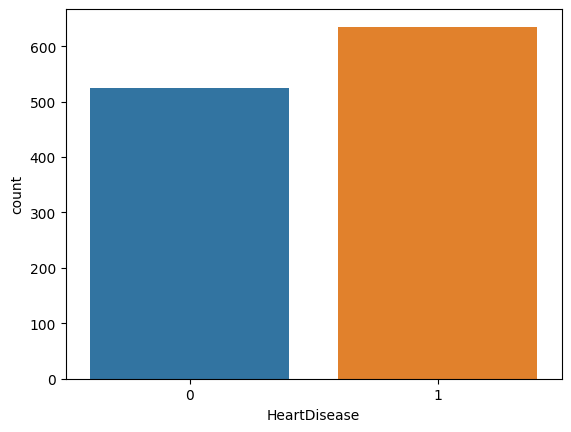

In [384]:
sns.countplot(data = df,x="HeartDisease")

In [385]:
#The dataset is equally distributed among 0 and 1 in Heart disease column

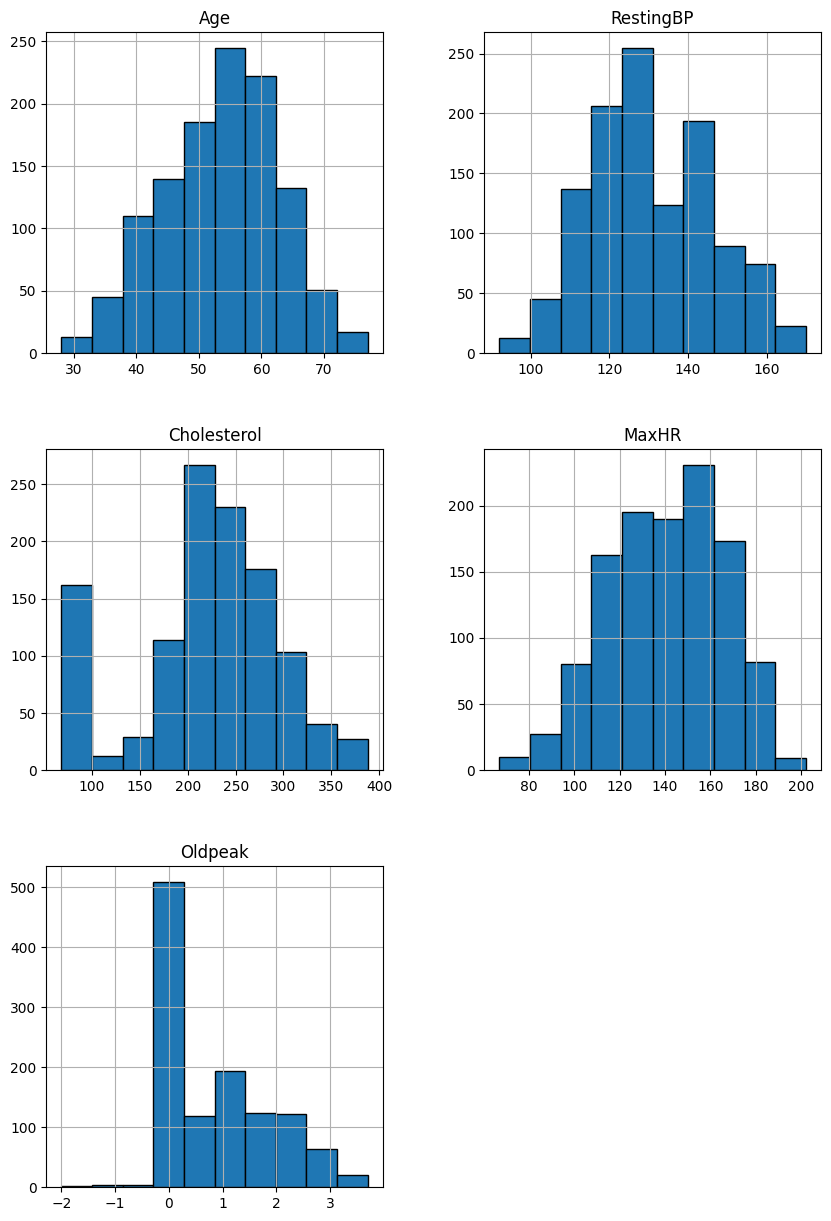

In [386]:
df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].hist(edgecolor='black', figsize=(10,15))
plt.show()

<AxesSubplot:ylabel='None'>

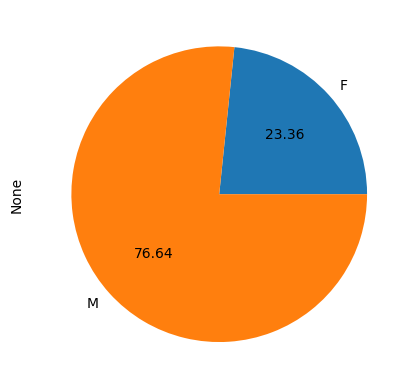

In [387]:
df.groupby(by="Sex").size().plot(kind="pie",autopct="%.2f")

In [388]:
#visualizing the distribution of sex

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

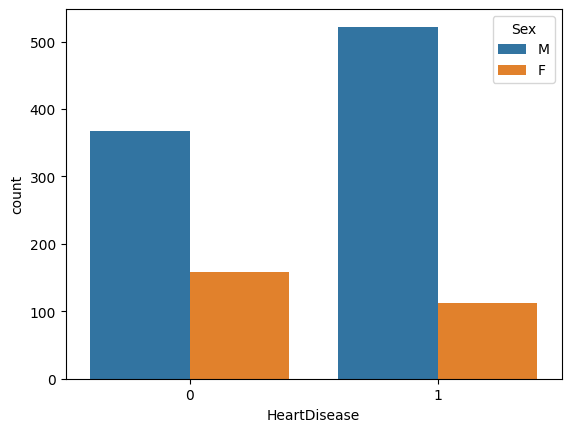

In [389]:
sns.countplot(x='HeartDisease',hue='Sex', data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

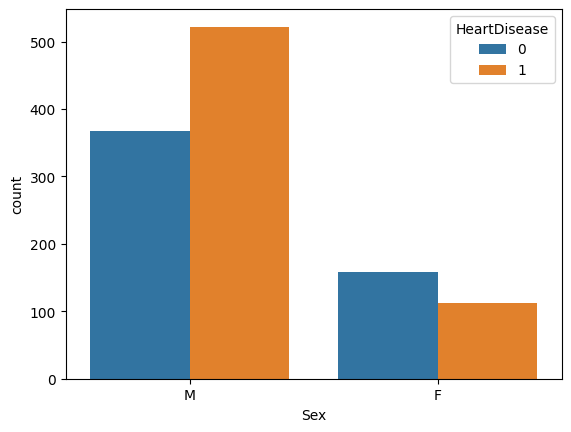

In [390]:
sns.countplot(hue='HeartDisease', x='Sex', data=df)

In [391]:
#From this Countplot we can conclude that the sex male has a higher chance of having a heart disease than female

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

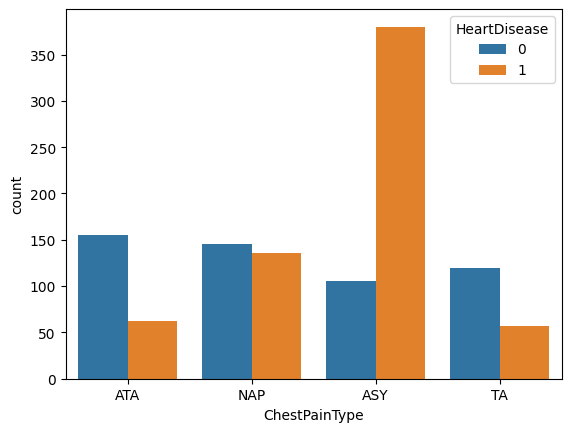

In [392]:
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)

In [393]:
#From this plot we can conclude that the patient having the chest pain type ASY tend to have heart disease more than other chest pain types

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

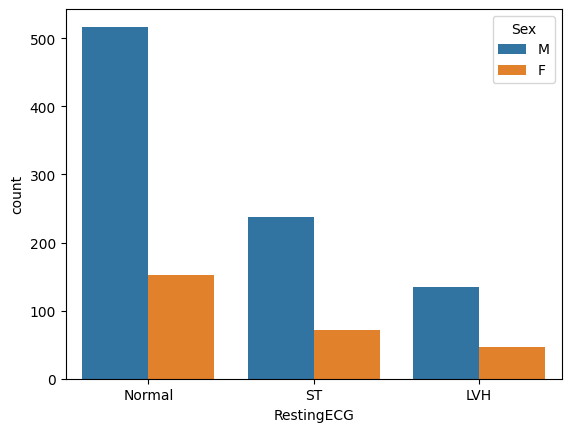

In [394]:
sns.countplot(x='RestingECG',hue='Sex', data=df)

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

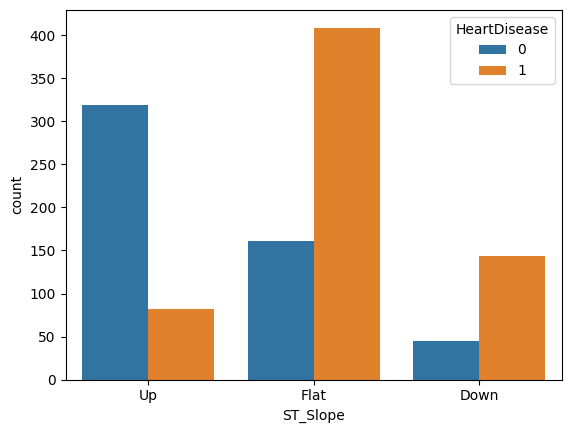

In [395]:
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df)

In [396]:
#From the above figure we can conclude that the patients having ST_Slope value up have lower chance of having a heart disease

In [397]:
#sns.heatmap(df.corr(numeric_only=True), annot=True)

In [398]:
#From this above heatmap we can conclude that the features age and maxhr are inversely propotional which means as age increase old peak decreases

In [399]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1216,57,F,TA,140,241.0,0,ST,123,Y,0.2,Flat,0
1217,45,M,ASY,110,264.0,0,ST,132,N,1.2,Flat,0
1218,68,M,TA,144,193.0,1,ST,141,N,3.4,Flat,0
1219,57,M,TA,130,131.0,0,ST,115,Y,1.2,Flat,0


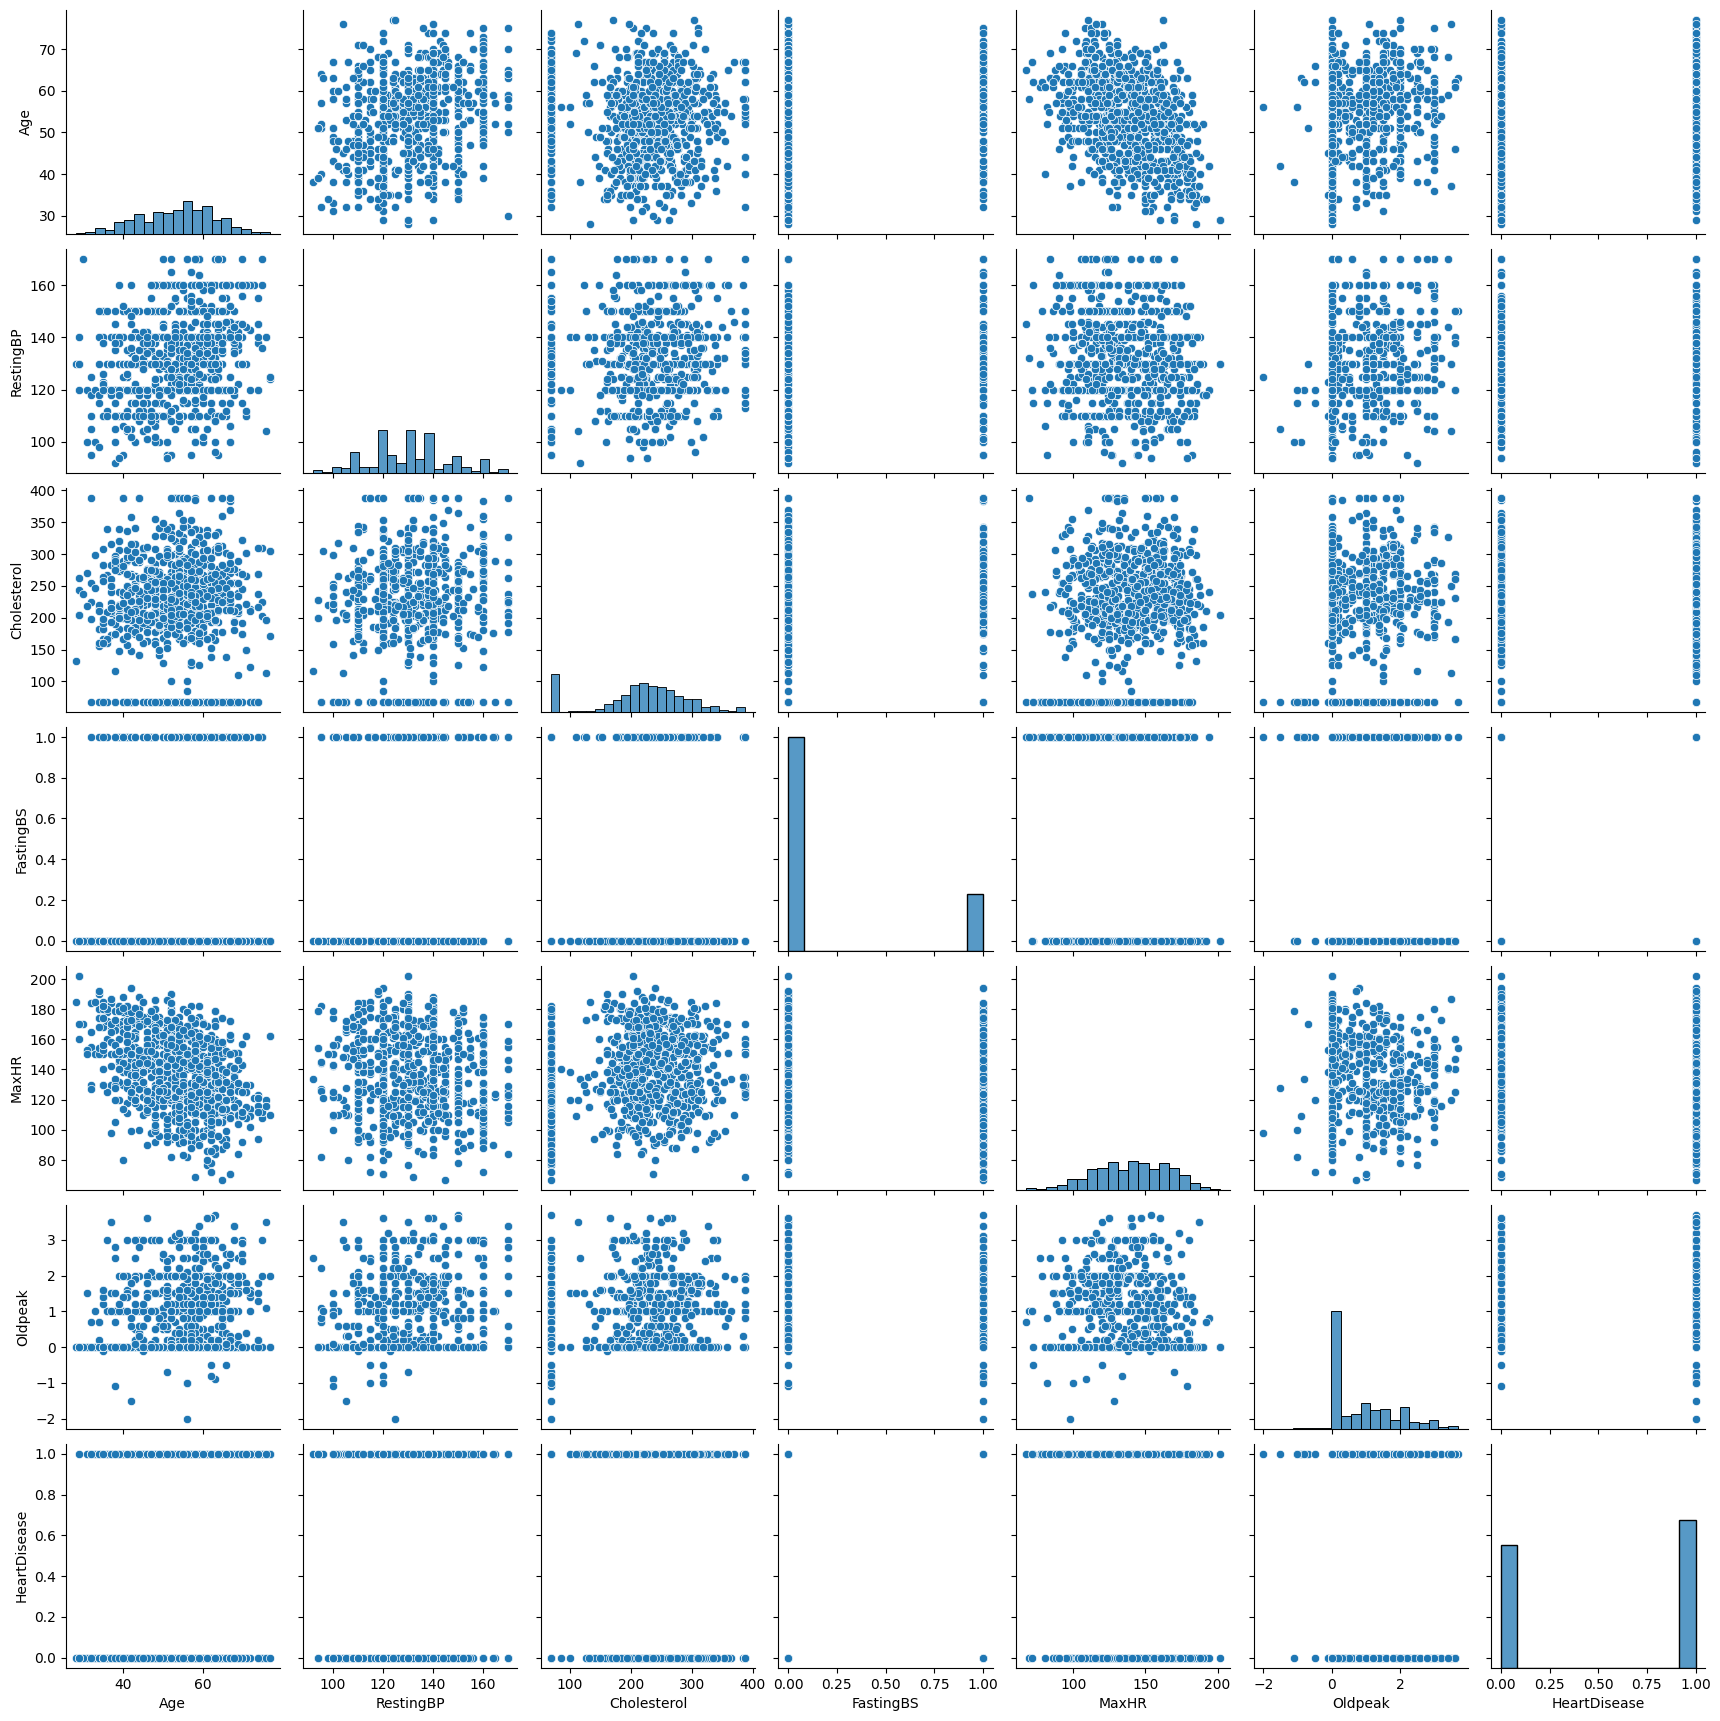

In [400]:
sns.pairplot(df)

In [401]:
#From the above pairplot we can conclude that maxhr and age are inversely proprotional

<AxesSubplot:xlabel='Age', ylabel='count'>

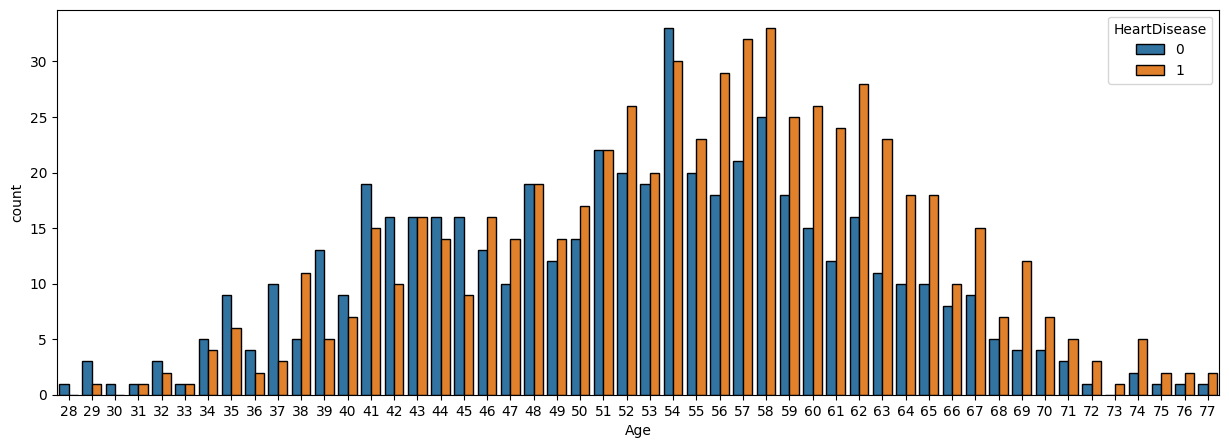

In [402]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Age"],data = df,hue = "HeartDisease", edgecolor = 'black')

In [403]:
#From this figure we can conclude that heart disease are likely to occur in people who are above the age of 50

In [404]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1216,57,F,TA,140,241.0,0,ST,123,Y,0.2,Flat,0
1217,45,M,ASY,110,264.0,0,ST,132,N,1.2,Flat,0
1218,68,M,TA,144,193.0,1,ST,141,N,3.4,Flat,0
1219,57,M,TA,130,131.0,0,ST,115,Y,1.2,Flat,0


In [405]:
df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [406]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You are using pip version 18.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [407]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [420]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sex"] = pd.DataFrame(le.fit_transform(df["Sex"]))
df["ChestPainType"] = pd.DataFrame(le.fit_transform(df["ChestPainType"]))
df["ExerciseAngina"] = pd.DataFrame(le.fit_transform(df["ExerciseAngina"]))
df["ST_Slope"] = pd.DataFrame(le.fit_transform(df["ST_Slope"]))
df["RestingECG"] = pd.DataFrame(le.fit_transform(df["RestingECG"]))


In [421]:
df

,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,4,54,1,2,150,195.0,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,1216,57,0,3,140,241.0,0,2,123,1,0.2,1,0
1156,1217,45,1,0,110,264.0,0,2,132,0,1.2,1,0
1157,1218,68,1,3,144,193.0,1,2,141,0,3.4,1,0
1158,1219,57,1,3,130,131.0,0,2,115,1,1.2,1,0


In [409]:
df =df.reset_index()

In [416]:
df23 = df

In [417]:
df["Sex"].unique()

array(['M', 'F'], dtype=object)

In [424]:
features = df[df.columns.drop(['HeartDisease'])].values
target = df['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [412]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

In [428]:
def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

c:\Users\venkatesh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\venkatesh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    http

Accuracy :  80.17%


c:\Users\venkatesh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\venkatesh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    http

Cross Validation Score :  85.46%
ROC_AUC Score :  79.63%


c:\Users\venkatesh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


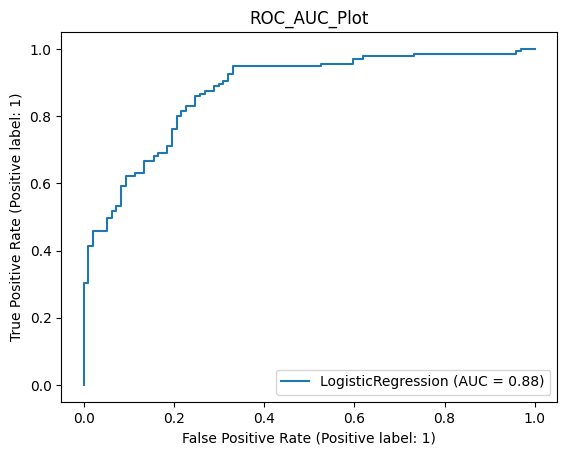

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        97
           1       0.83      0.83      0.83       135

    accuracy                           0.80       232
   macro avg       0.80      0.80      0.80       232
weighted avg       0.80      0.80      0.80       232



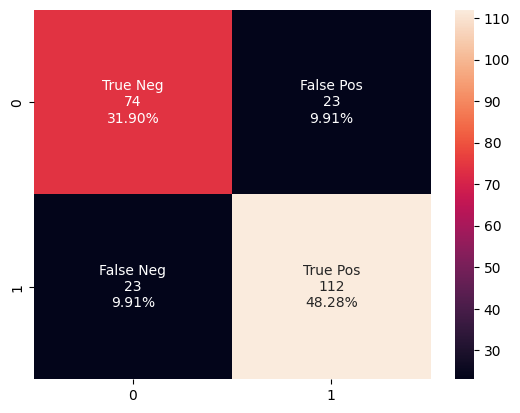

In [429]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 
model(classifier_lr)
model_evaluation(classifier_lr)

Accuracy :  90.52%
Cross Validation Score :  94.96%
ROC_AUC Score :  90.11%


c:\Users\venkatesh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


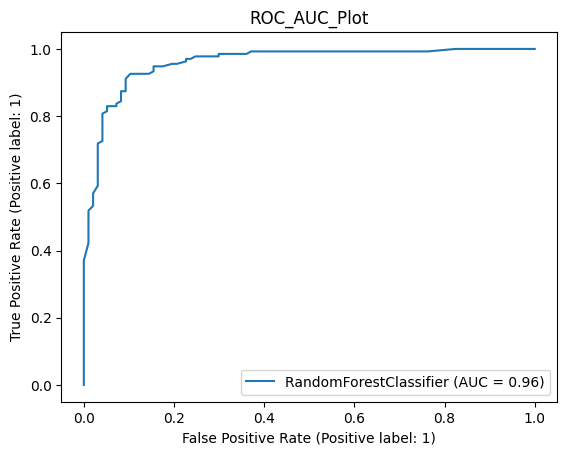

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        97
           1       0.91      0.93      0.92       135

    accuracy                           0.91       232
   macro avg       0.90      0.90      0.90       232
weighted avg       0.91      0.91      0.91       232



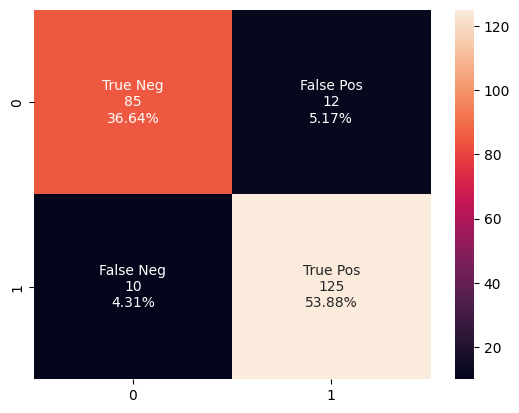

In [460]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf= RandomForestClassifier()
model(classifier_rf)
model_evaluation(classifier_rf)

Accuracy :  84.05%
Cross Validation Score :  84.58%
ROC_AUC Score :  84.85%


c:\Users\venkatesh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


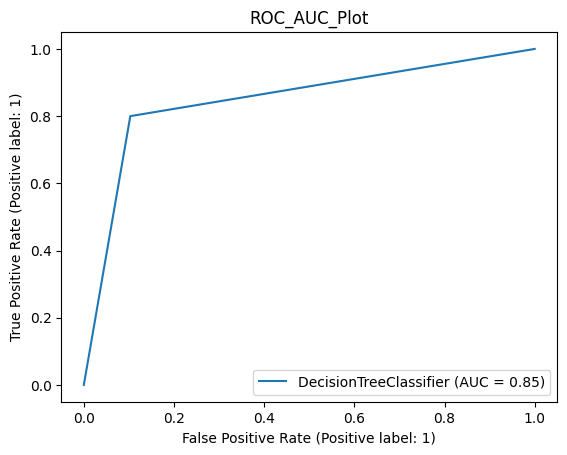

              precision    recall  f1-score   support

           0       0.76      0.90      0.82        97
           1       0.92      0.80      0.85       135

    accuracy                           0.84       232
   macro avg       0.84      0.85      0.84       232
weighted avg       0.85      0.84      0.84       232



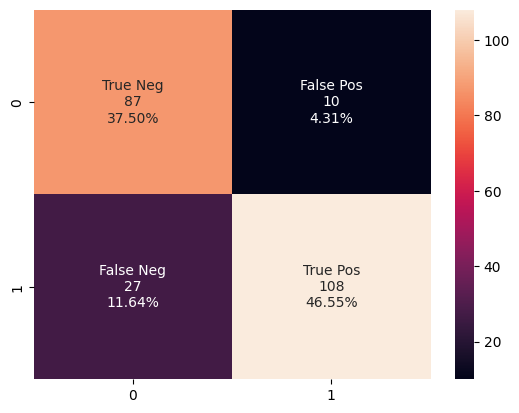

In [431]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier()
model(classifier_dtc)
model_evaluation(classifier_dtc)  

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False] 
    }
gcv = GridSearchCV(param_grid=param_grid,estimator=classifier_rf,cv=5, scoring='accuracy', n_jobs=1, verbose=2)
gcv.fit(x_train,y_train)




Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(bootstrap=False, max_depth=10),
             n_jobs=1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
print(gcv.best_params_)

{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


Accuracy :  91.38%
Cross Validation Score :  95.03%
ROC_AUC Score :  91.43%


c:\Users\venkatesh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


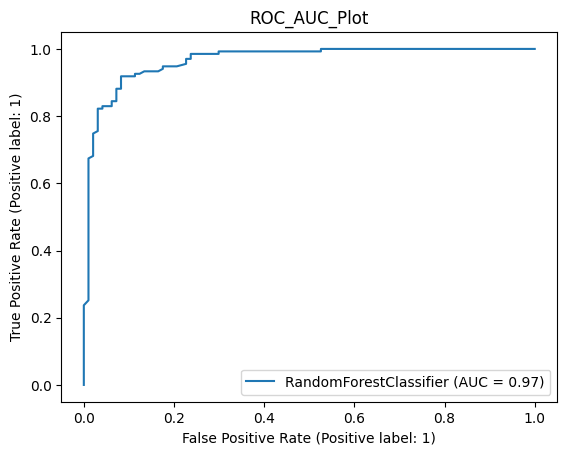

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        97
           1       0.94      0.91      0.92       135

    accuracy                           0.91       232
   macro avg       0.91      0.91      0.91       232
weighted avg       0.91      0.91      0.91       232



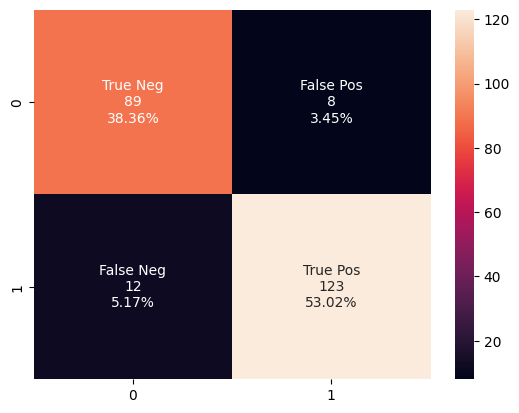

In [ ]:
classifier_rf = RandomForestClassifier(bootstrap=False,min_samples_leaf=2,min_samples_split=2,max_depth=20,n_estimators=200)
model(classifier_rf)
model_evaluation(classifier_rf)